# Importing Libraries

In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the dataset (.csv file)

In [116]:
data_frame = pd.read_csv('../Dataset/car data.csv') 

# Features of the Dataset

In [117]:
data_frame.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [118]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [119]:
data_frame.shape

(301, 9)

In [120]:
data_frame.drop('Owner', inplace=True, axis=1)

In [121]:
data_frame.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual


In [122]:
data_frame['Fuel_Type'].value_counts()
data_frame['Seller_Type'].value_counts()
data_frame['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

# Data Visualization

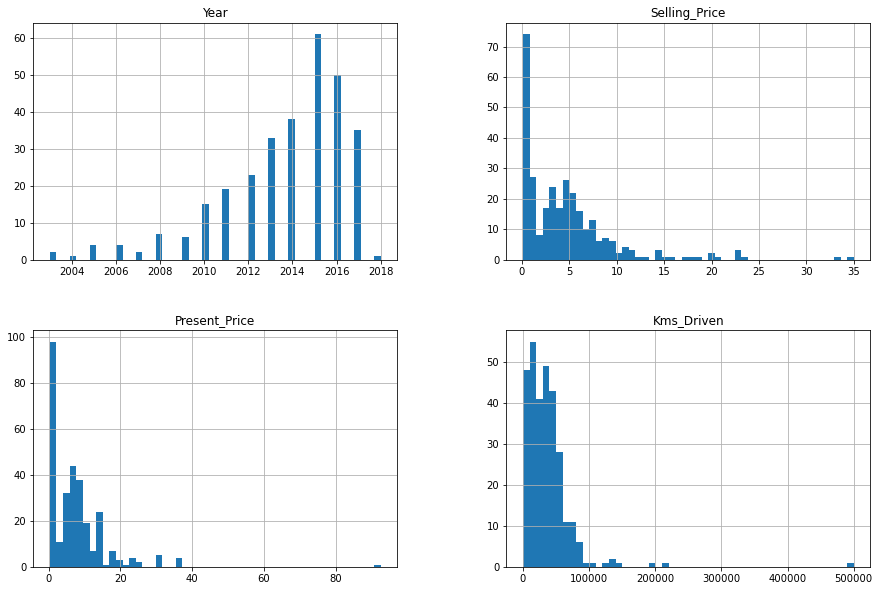

In [123]:
histograms = data_frame.hist(bins = 50, figsize = (15, 10))

# Handling Categorical Variables

In [124]:
data_frame.replace({'Fuel_Type' : {'Petrol' : 0, 'Diesel' : 1, 'CNG': 2}}, inplace = True)
data_frame.replace({'Seller_Type' : {'Dealer' : 0, 'Individual' : 1}}, inplace = True)
data_frame.replace({'Transmission' : {'Manual' : 0, 'Automatic' : 1}}, inplace = True)

In [125]:
data_frame.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,ritz,2014,3.35,5.59,27000,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0


# Importing Libraries for Linear Regression

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [127]:
X = data_frame.drop(['Car_Name', 'Selling_Price'], axis = 1) 
Y = data_frame['Selling_Price']

# Splitting data into training and testing set

In [128]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.25, random_state = 99)

In [129]:
Training_Lr_model = LinearRegression()
Training_Lr_model.fit(X_train, Y_train)

LinearRegression()

# Training the regression model

In [130]:
model_pred = Training_Lr_model.predict(X_valid)

## Computing the R-Squared Error

In [131]:
error_score_valid = metrics.r2_score(Y_valid, Training_Lr_model.predict(X_valid))
error_score_train = metrics.r2_score(Y_train, Training_Lr_model.predict(X_train))
print(error_score_train, error_score_valid)

0.8701437844386817 0.8971336593351005


# Plot of Real Price Vs Predicted Price of Car Sales

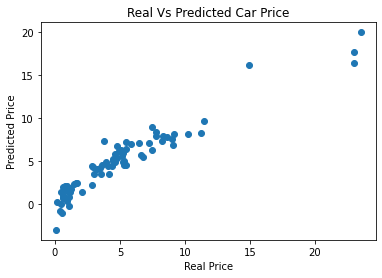

In [132]:
plt.scatter(Y_valid, model_pred)
plt.xlabel("Real Price")
plt.ylabel("Predicted Price")
plt.title("Real Vs Predicted Car Price")
plt.show()

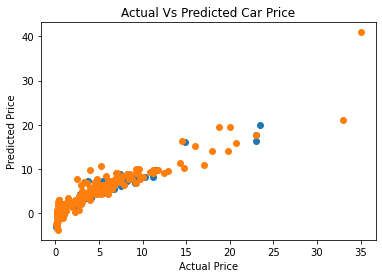

In [133]:
plt.scatter(Y_valid, model_pred, label = 'Valid')
plt.scatter(Y_train, Training_Lr_model .predict(X_train), label = 'Train')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Vs Predicted Car Price")
plt.show()

# Linear Regression Prediction using Ordinary Least Squares Method(OLS)

In [134]:
import statsmodels.api as sm

In [136]:
model = sm.OLS(Y_valid, model_pred).fit()
model_prediction = model.predict(model_pred) 

model_details = model.summary()
print(model_details)

                                 OLS Regression Results                                
Dep. Variable:          Selling_Price   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              1569.
Date:                Sat, 17 Jul 2021   Prob (F-statistic):                    4.93e-52
Time:                        23:24:12   Log-Likelihood:                         -138.22
No. Observations:                  76   AIC:                                      278.4
Df Residuals:                      75   BIC:                                      280.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------